In [88]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [89]:
rt_xls = pd.ExcelFile('Data/rpt.00013061.0000000000000000.RTMLZHBSPP_2010.xlsx')
print(rt_xls.sheet_names)

rt = pd.concat(
    (pd.read_excel(rt_xls, sheet_name=s) for s in rt_xls.sheet_names),
    ignore_index=True
)

rt

['Dec_1']


,Delivery Date,Delivery Hour,Delivery Interval,Repeated Hour Flag,Settlement Point Name,Settlement Point Type,Settlement Point Price
0,12/01/2010,1,1,N,HB_BUSAVG,SH,25.08
1,12/01/2010,1,2,N,HB_BUSAVG,SH,23.19
2,12/01/2010,1,3,N,HB_BUSAVG,SH,23.59
3,12/01/2010,1,4,N,HB_BUSAVG,SH,22.23
4,12/01/2010,1,1,N,HB_HOUSTON,HU,25.08
...,...,...,...,...,...,...,...
41659,12/31/2010,24,4,N,LZ_SOUTH,LZ,25.18
41660,12/31/2010,24,1,N,LZ_WEST,LZ,26.41
41661,12/31/2010,24,2,N,LZ_WEST,LZ,25.58
41662,12/31/2010,24,3,N,LZ_WEST,LZ,25.80


In [90]:
zone = "LZ_HOUSTON"

rtm_z = rt[rt["Settlement Point Name"] == zone].copy()

In [91]:
rtm_z

,Delivery Date,Delivery Hour,Delivery Interval,Repeated Hour Flag,Settlement Point Name,Settlement Point Type,Settlement Point Price
32,12/01/2010,1,1,N,LZ_HOUSTON,LZ,25.08
33,12/01/2010,1,2,N,LZ_HOUSTON,LZ,23.20
34,12/01/2010,1,3,N,LZ_HOUSTON,LZ,23.45
35,12/01/2010,1,4,N,LZ_HOUSTON,LZ,22.17
88,12/01/2010,2,1,N,LZ_HOUSTON,LZ,21.96
...,...,...,...,...,...,...,...
41587,12/31/2010,23,4,N,LZ_HOUSTON,LZ,22.16
41640,12/31/2010,24,1,N,LZ_HOUSTON,LZ,26.41
41641,12/31/2010,24,2,N,LZ_HOUSTON,LZ,25.58
41642,12/31/2010,24,3,N,LZ_HOUSTON,LZ,25.80


In [92]:

mask_24 = rtm_z["Delivery Hour"] == 24
rtm_z.loc[mask_24, "Delivery Hour"] = 0
rtm_z.loc[mask_24, "Delivery Date"] = (
    pd.to_datetime(rtm_z.loc[mask_24, "Delivery Date"]) + pd.Timedelta(days=1)
).dt.strftime("%m/%d/%Y")

rtm_z["datetime"] = pd.to_datetime(
    rtm_z["Delivery Date"] + " " + rtm_z["Delivery Hour"].astype(str),
    format="%m/%d/%Y %H"
)

rtm_z = rtm_z.set_index("datetime").sort_index()
rtm_z = rtm_z.rename(columns={"Settlement Point Price": "RTM_15min"})

rtm_hourly = rtm_z["RTM_15min"].groupby("datetime").mean().to_frame("RTM")

In [93]:
rtm_hourly

,RTM
datetime,
2010-12-01 01:00:00,23.4750
2010-12-01 02:00:00,21.4675
2010-12-01 03:00:00,21.3100
2010-12-01 04:00:00,22.3500
2010-12-01 05:00:00,24.3925
...,...
2010-12-31 20:00:00,31.1775
2010-12-31 21:00:00,27.2700
2010-12-31 22:00:00,25.1375


In [94]:
# federal funds rate in december of 12/1/2010 is 0.18%
fed_funds_df = pd.read_csv('Data/FEDFUNDS.csv')
fed_funds_df

,observation_date,FEDFUNDS
0,10/1/2010,0.19
1,11/1/2010,0.19
2,12/1/2010,0.18


In [95]:
fed_funds_rate = fed_funds_df[fed_funds_df['observation_date'] == '12/1/2010']['FEDFUNDS'].values[0]
fed_funds_rate

0.18

In [96]:
import netCDF4

temp = netCDF4.Dataset('Data/texas_focused_weather.nc')



In [97]:
lat = np.asarray(temp.variables['latitude'])
lon = np.asarray(temp.variables['longitude'])
# temperature 2 meters above ground level
t2m = np.asarray(temp.variables['t2m']) # shape (time, lat, lon)

In [98]:
# time is in hours (31 * 24 = 744 hours)
t2m = t2m[-744:, :, :]  # last 744 hours of December 2010
t2m.shape 

(744, 24, 42)

In [99]:
# # taking the sub grid of interest (around Texas)
# temp_sub = t2m[:, 208:257, 1006:1064]
# temp_sub.shape

temp_sub = t2m
print(temp_sub.shape)

(744, 24, 42)


In [100]:
import yfinance as yf

data = yf.download(
    "SPY",
    start="2010-12-01",
    end="2011-01-01",
    interval="1d"
)
data


C:\Users\johng\AppData\Local\Temp\ipykernel_18008\190695544.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
Date,,,,,
2010-12-01,92.360107,92.535650,91.734248,91.741876,221037200
2010-12-02,93.543121,93.611816,92.451683,92.505110,191213600
2010-12-03,93.795021,93.901875,93.199692,93.222588,151288900
2010-12-06,93.695786,93.909493,93.497341,93.596560,103050500
2010-12-07,93.749229,94.649857,93.695803,94.596430,206581000
2010-12-08,94.092651,94.168975,93.428633,93.863682,138019200
2010-12-09,94.459023,94.657462,93.993443,94.619303,123705100
2010-12-10,95.008583,95.100169,94.436150,94.749077,117571700


In [101]:

ffr = np.full(744, fed_funds_rate, dtype=float)

# 2. Convert daily SPY data to hourly array of length 744


spy_daily = data["Close"]

idx = pd.date_range("2010-12-01", "2010-12-31 23:00", freq="H")



C:\Users\johng\AppData\Local\Temp\ipykernel_18008\4257181674.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  idx = pd.date_range("2010-12-01", "2010-12-31 23:00", freq="H")


In [102]:
spy_daily

Ticker,SPY
Date,
2010-12-01,92.360107
2010-12-02,93.543121
2010-12-03,93.795021
2010-12-06,93.695786
2010-12-07,93.749229
2010-12-08,94.092651
2010-12-09,94.459023
2010-12-10,95.008583
2010-12-13,95.069611


We now have said data: rtm - (744), fed funds - (744), spy - (744), t2m - (744, 49, 58). I would like to predict the average real time value of electricity on the last day.

In [103]:
rtm_hourly.shape

(744, 1)

making it such that the weekend spy prices stay the same as the previous (market is closed on weekends)

In [104]:

spy_daily_full = spy_daily.asfreq("D").ffill()
idx = pd.date_range("2010-12-01", "2010-12-31", freq="D")
spy_daily_full = spy_daily.reindex(idx).ffill()

In [105]:
start = spy_daily_full.index.min()
end   = spy_daily_full.index.max()

idx_hourly = pd.date_range(start, end + pd.Timedelta(hours=23), freq="H")

spy_hourly = spy_daily_full.reindex(idx_hourly, method="ffill")
spy_hourly.shape

C:\Users\johng\AppData\Local\Temp\ipykernel_18008\3564471548.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  idx_hourly = pd.date_range(start, end + pd.Timedelta(hours=23), freq="H")


(744, 1)

In [106]:
print(rtm_hourly.shape)
print(spy_hourly.shape)

print(temp_sub.shape)
print(ffr.shape)

(744, 1)
(744, 1)
(744, 24, 42)
(744,)


Having a Model which preserves Spatial Dimensions of T2M

In [107]:
import numpy as np
import pandas as pd

T = rtm_hourly.shape[0]  # 744 for one month
feature_cols = ["RT", "SPY", "FFR", "hour", "dow", "month"]

idx = pd.date_range("2010-12-01", periods=T, freq="H")  # adjust start

df_scalar = pd.DataFrame(index=idx)
df_scalar["RT"]   = rtm_hourly.squeeze()
df_scalar["SPY"]  = spy_hourly.squeeze()
df_scalar["FFR"]  = ffr.astype("float32")

# calendar features
df_scalar["hour"]  = df_scalar.index.hour
df_scalar["dow"]   = df_scalar.index.dayofweek
df_scalar["month"] = df_scalar.index.month


C:\Users\johng\AppData\Local\Temp\ipykernel_18008\4271329016.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  idx = pd.date_range("2010-12-01", periods=T, freq="H")  # adjust start


In [108]:
mask_valid = ~df_scalar[feature_cols + ["RT"]].isna().any(axis=1)
df_scalar = df_scalar[mask_valid]
t2m_sub = temp_sub[mask_valid.to_numpy()]  # keep t2m in sync with time axis

In [109]:
df_scalar.head()

,RT,SPY,FFR,hour,dow,month
2010-12-01 01:00:00,23.4750,92.360107,0.18,1,2,12
2010-12-01 02:00:00,21.4675,92.360107,0.18,2,2,12
2010-12-01 03:00:00,21.3100,92.360107,0.18,3,2,12
2010-12-01 04:00:00,22.3500,92.360107,0.18,4,2,12
2010-12-01 05:00:00,24.3925,92.360107,0.18,5,2,12


In [110]:
H, W = temp_sub.shape[1], temp_sub.shape[2]

In [118]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# --- CONFIGURATION ---
past_hours   = 24
future_hours = 24
# Define which columns are "Time" (Known in the future)
time_cols = ["hour", "dow", "month"] 

# --- 1. SCALING ---
train_size = int(len(df_scalar) * 0.8)

# Scale Scalars (All of them)
scaler_scalars = StandardScaler()
scaler_scalars.fit(df_scalar[feature_cols].iloc[:train_size])
df_scalar_scaled = df_scalar.copy()
df_scalar_scaled[feature_cols] = scaler_scalars.transform(df_scalar[feature_cols])

# Scale Target (RT)
scaler_target = StandardScaler()
scaler_target.fit(df_scalar[["RT"]].iloc[:train_size])
df_scalar_scaled["RT"] = scaler_target.transform(df_scalar[["RT"]])

# Scale Grid
global_mean_temp = np.mean(temp_sub[:train_size])
global_std_temp  = np.std(temp_sub[:train_size])
temp_sub_scaled = (temp_sub - global_mean_temp) / global_std_temp

# --- 2. DATA GENERATOR (UPDATED) ---
def make_supervised_final(df_scalar, t2m_grid, past_hours, future_hours, feature_cols, time_cols, noise_std=0.5):
    # 1. Prepare Data arrays
    values = df_scalar[feature_cols].to_numpy().astype("float32") # All scalars
    time_values = df_scalar[time_cols].to_numpy().astype("float32") # Just time scalars
    rt = df_scalar["RT"].to_numpy().astype("float32")
    
    T = values.shape[0]
    
    X_grid_past, X_grid_fut, X_seq_past, X_seq_fut, Y = [], [], [], [], []
    
    # Step=24 to have non-overlapping days (optional, can remove step to get more data)
    for t in range(0, T - past_hours - future_hours + 1): 
        
        # A. Past Weather
        grid_past = t2m_grid[t : t + past_hours][..., np.newaxis]
        
        # B. Future Weather (Noisy)
        grid_fut_true = t2m_grid[t + past_hours : t + past_hours + future_hours]
        noise = np.random.normal(0, noise_std, grid_fut_true.shape)
        grid_fut = (grid_fut_true + noise)[..., np.newaxis]

        # C. Past Scalars (Price, Time, etc.)
        seq_past = values[t : t + past_hours]
        
        # D. FUTURE SCALARS (Crucial for Shape!)
        # We grab the time features for the NEXT 24 hours
        seq_fut = time_values[t + past_hours : t + past_hours + future_hours]
        
        # E. Target
        target = rt[t + past_hours : t + past_hours + future_hours]
        
        X_grid_past.append(grid_past)
        X_grid_fut.append(grid_fut)
        X_seq_past.append(seq_past)
        X_seq_fut.append(seq_fut)
        Y.append(target)
    
    return (np.stack(X_grid_past), np.stack(X_grid_fut), 
            np.stack(X_seq_past), np.stack(X_seq_fut), np.stack(Y))

# Generate Data
Xg_p, Xg_f, Xs_p, Xs_f, Y_new = make_supervised_final(
    df_scalar_scaled, temp_sub_scaled, past_hours, future_hours, feature_cols, time_cols
)

# Split
Xg_p_train, Xg_p_test = Xg_p[:train_size], Xg_p[train_size:]
Xg_f_train, Xg_f_test = Xg_f[:train_size], Xg_f[train_size:]
Xs_p_train, Xs_p_test = Xs_p[:train_size], Xs_p[train_size:]
Xs_f_train, Xs_f_test = Xs_f[:train_size], Xs_f[train_size:]
Y_train,    Y_test    = Y_new[:train_size], Y_new[train_size:]

print("Future Time Features Shape:", Xs_f.shape) # Should be (N, 24, 3)

Future Time Features Shape: (696, 24, 3)


In [119]:
from tensorflow.keras.layers import Input, ConvLSTM2D, BatchNormalization, Flatten, Conv1D, GlobalAveragePooling1D, Dense, Concatenate, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Shapes
H, W = Xg_p.shape[2], Xg_p.shape[3]
n_scalar_past = Xs_p.shape[2]
n_scalar_fut  = Xs_f.shape[2] # (Hour, DOW, Month)

# 1. Past Grid (Weather History)
in_grid_p = Input(shape=(past_hours, H, W, 1), name="grid_past")
x1 = ConvLSTM2D(16, (3,3), padding="same", return_sequences=False, activation="relu")(in_grid_p)
x1 = Flatten()(x1)

# 2. Future Grid (Weather Forecast)
in_grid_f = Input(shape=(future_hours, H, W, 1), name="grid_fut")
x2 = ConvLSTM2D(16, (3,3), padding="same", return_sequences=False, activation="relu")(in_grid_f)
x2 = Flatten()(x2)

# 3. Past Scalars (Price History)
in_seq_p = Input(shape=(past_hours, n_scalar_past), name="seq_past")
x3 = Conv1D(32, 3, padding="causal", activation="relu")(in_seq_p)
x3 = GlobalAveragePooling1D()(x3)

# 4. FUTURE SCALARS (The "Clock") -- DIRECT INJECTION
# We flatten this immediately so the Dense layer sees "Hour=19" explicitly
in_seq_f = Input(shape=(future_hours, n_scalar_fut), name="seq_fut")
x4 = Flatten()(in_seq_f) 

# Combine
merged = Concatenate()([x1, x2, x3, x4])

# Dense Layers (The "Brain")
m = Dense(128, activation="relu")(merged)
m = Dropout(0.2)(m) # Added Dropout to prevent memorization
m = Dense(64, activation="relu")(m)

# Output
out = Dense(future_hours)(m)

model_duck = Model(inputs=[in_grid_p, in_grid_f, in_seq_p, in_seq_f], outputs=out)
model_duck.compile(optimizer=Adam(1e-4), loss="mse", metrics=["mae"])

# Train
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = model_duck.fit(
    [Xg_p_train, Xg_f_train, Xs_p_train, Xs_f_train], Y_train,
    validation_data=([Xg_p_test, Xg_f_test, Xs_p_test, Xs_f_test], Y_test),
    epochs=150, 
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 140ms/step - loss: 1.0215 - mae: 0.3276 - val_loss: 0.0903 - val_mae: 0.2376
Epoch 2/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step - loss: 1.0030 - mae: 0.3088 - val_loss: 0.0905 - val_mae: 0.2400
Epoch 3/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 179ms/step - loss: 0.9995 - mae: 0.3050 - val_loss: 0.0886 - val_mae: 0.2373
Epoch 4/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 148ms/step - loss: 1.0007 - mae: 0.3058 - val_loss: 0.0888 - val_mae: 0.2388
Epoch 5/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 174ms/step - loss: 1.0003 - mae: 0.3053 - val_loss: 0.0890 - val_mae: 0.2372
Epoch 6/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 161ms/step - loss: 0.9978 - mae: 0.3073 - val_loss: 0.0890 - val_mae: 0.2386
Epoch 7/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 169ms/step - loss: 0.9956 - mae: 0.3062 - val_loss: 0.0887 - val_mae: 0.2370
Epoch 8/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 149ms/step - loss: 0.9939 - mae: 0.3034 - val_loss: 0.0907 - val_mae: 0.2421
Epoch 9/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 153ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


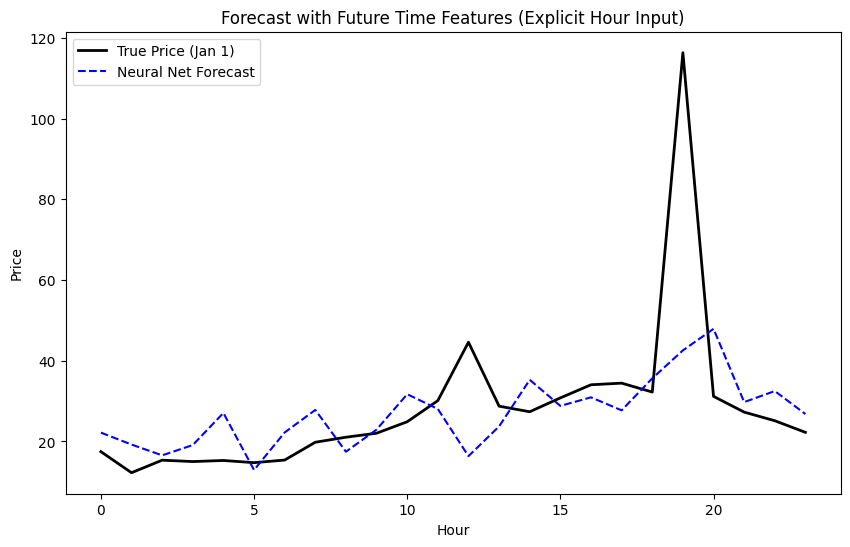

In [120]:
import matplotlib.pyplot as plt

# 1. Grab Last Sample (Jan 1st)
Xg_p_last = Xg_p[-1:]
Xg_f_last = Xg_f[-1:]
Xs_p_last = Xs_p[-1:]
Xs_f_last = Xs_f[-1:]
Y_last    = Y_new[-1:]

# 2. Predict
pred_scaled = model_final.predict([Xg_p_last, Xg_f_last, Xs_p_last, Xs_f_last])

# 3. Inverse Transform
pred_dollars = scaler_target.inverse_transform(pred_scaled)
true_dollars = scaler_target.inverse_transform(Y_last)

# 4. Plot
plt.figure(figsize=(10,6))
plt.plot(true_dollars[0], label="True Price (Jan 1)", color="black", linewidth=2)
plt.plot(pred_dollars[0], label="Neural Net Forecast", color="blue", linestyle="--")
plt.title("Forecast with Future Time Features (Explicit Hour Input)")
plt.xlabel("Hour")
plt.ylabel("Price")
plt.legend()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


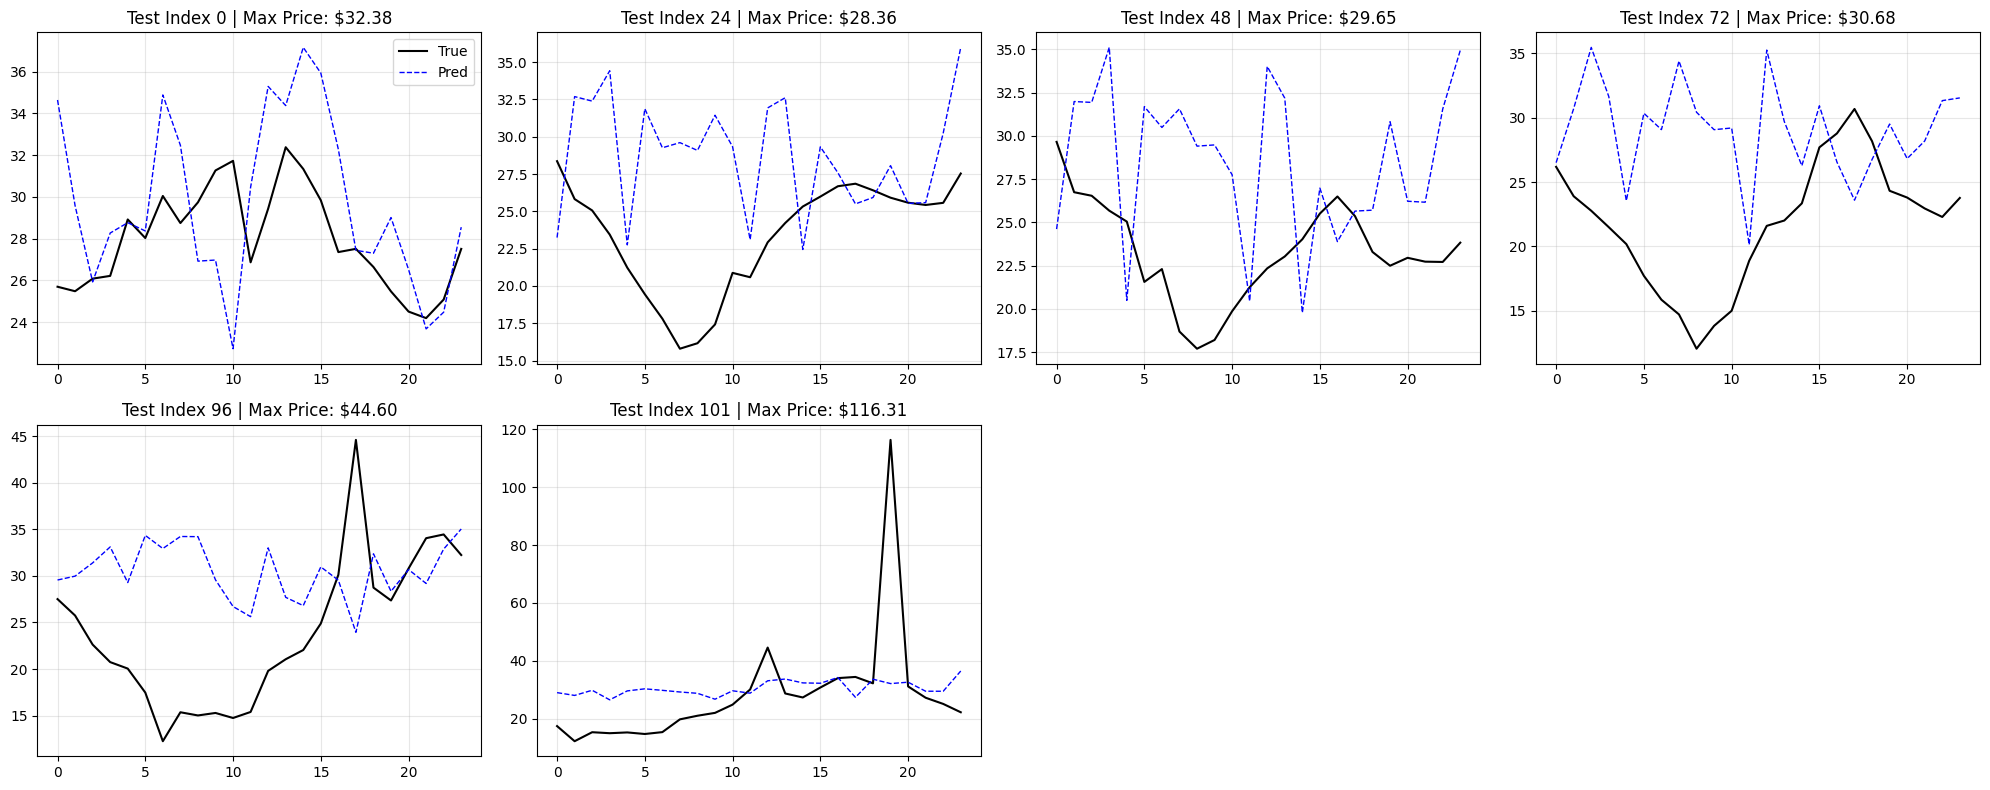

In [117]:
import matplotlib.pyplot as plt
import numpy as np
import math

# 1. Predict on the ENTIRE test set (using your rolling data)
pred_scaled_all = model_forecast.predict([Xg_past_test, Xg_fut_test, Xs_test])

# 2. Inverse Transform
pred_dollars_all = scaler_target.inverse_transform(pred_scaled_all)
true_dollars_all = scaler_target.inverse_transform(Y_test)

# 3. Setup Plotting - We will plot every 24th sample
#    This simulates "One Plot Per Day"
indices_to_plot = list(range(0, len(true_dollars_all), 24))

# Ensure the very last sample (Jan 1st) is included if it wasn't picked up
if (len(true_dollars_all) - 1) not in indices_to_plot:
    indices_to_plot.append(len(true_dollars_all) - 1)

cols = 4
rows = math.ceil(len(indices_to_plot) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(20, 4 * rows))
axes = axes.flatten()

# 4. Loop through selected indices
for i, idx in enumerate(indices_to_plot):
    ax = axes[i]
    
    # Get the data for this specific window
    y_true = true_dollars_all[idx]
    y_pred = pred_dollars_all[idx]
    
    # Plot
    ax.plot(y_true, color="black", linewidth=1.5, label="True")
    ax.plot(y_pred, color="blue", linestyle="--", linewidth=1, label="Pred")
    
    # Check max price to help you find the $43 day
    max_p = np.max(y_true)
    
    ax.set_title(f"Test Index {idx} | Max Price: ${max_p:.2f}")
    ax.grid(True, alpha=0.3)
    
    if i == 0:
        ax.legend()

# Hide unused subplots
for i in range(len(indices_to_plot), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
last_grid_block = temp_sub[-past_hours:]              # (24, H, W)
last_grid_block = last_grid_block[..., np.newaxis]   # (24, H, W, 1)

last_seq_block = df_scalar[feature_cols].to_numpy().astype("float32")[-past_hours:]

Xg_last = np.expand_dims(last_grid_block, axis=0)    # (1, 24, H, W, 1)
Xs_last = np.expand_dims(last_seq_block,  axis=0)    # (1, 24, n_scalar)

next_24_forecast = model.predict([Xg_last, Xs_last])[0]  # shape (24,)
print("Next 24-hour forecast:", next_24_forecast)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Next 24-hour forecast: [ -3.153389   -12.27652      0.50772774   2.2697325   -2.4393225
 -11.6229      -6.694852     9.414691    -8.154207    -0.12956834
   0.9951564   -1.4649659   -2.935892    -0.10146092   1.8609997
  -8.25501      4.0910406   -4.482726   -10.806246    14.25754
   7.4081       6.9099154    5.4165554   -5.169633  ]


# Checking the actual values

In [ ]:
rt_2011_jan = pd.read_excel('Data/rpt.00013061.0000000000000000.RTMLZHBSPP_2011.xlsx', sheet_name='Jan_1')


In [ ]:
zone = "LZ_HOUSTON"
rtm_z = rt_2011_jan[rt_2011_jan["Settlement Point Name"] == zone].copy()
rtm_z


,Delivery Date,Delivery Hour,Delivery Interval,Repeated Hour Flag,Settlement Point Name,Settlement Point Type,Settlement Point Price
32,01/01/2011,1,1,N,LZ_HOUSTON,LZ,25.11
33,01/01/2011,1,2,N,LZ_HOUSTON,LZ,23.45
34,01/01/2011,1,3,N,LZ_HOUSTON,LZ,24.07
35,01/01/2011,1,4,N,LZ_HOUSTON,LZ,22.29
88,01/01/2011,2,1,N,LZ_HOUSTON,LZ,22.33
...,...,...,...,...,...,...,...
41587,01/31/2011,23,4,N,LZ_HOUSTON,LZ,12.58
41640,01/31/2011,24,1,N,LZ_HOUSTON,LZ,15.45
41641,01/31/2011,24,2,N,LZ_HOUSTON,LZ,14.73
41642,01/31/2011,24,3,N,LZ_HOUSTON,LZ,14.28


In [ ]:
mask_24 = rtm_z["Delivery Hour"] == 24
rtm_z.loc[mask_24, "Delivery Hour"] = 0
rtm_z.loc[mask_24, "Delivery Date"] = (
    pd.to_datetime(rtm_z.loc[mask_24, "Delivery Date"]) + pd.Timedelta(days=1)
).dt.strftime("%m/%d/%Y")

rtm_z["datetime"] = pd.to_datetime(
    rtm_z["Delivery Date"] + " " + rtm_z["Delivery Hour"].astype(str),
    format="%m/%d/%Y %H"
)

rtm_z = rtm_z.set_index("datetime").sort_index()
rtm_z = rtm_z.rename(columns={"Settlement Point Price": "RTM_15min"})

rtm_hourly_true = rtm_z["RTM_15min"].groupby("datetime").mean().to_frame("RTM")

In [ ]:
rtm_hourly_true[:24]

,RTM
datetime,
2011-01-01 01:00:00,23.7300
2011-01-01 02:00:00,22.1050
2011-01-01 03:00:00,21.3275
2011-01-01 04:00:00,20.9025
2011-01-01 05:00:00,21.6725
2011-01-01 06:00:00,22.3575
2011-01-01 07:00:00,23.2200
2011-01-01 08:00:00,23.7825
2011-01-01 09:00:00,25.9950


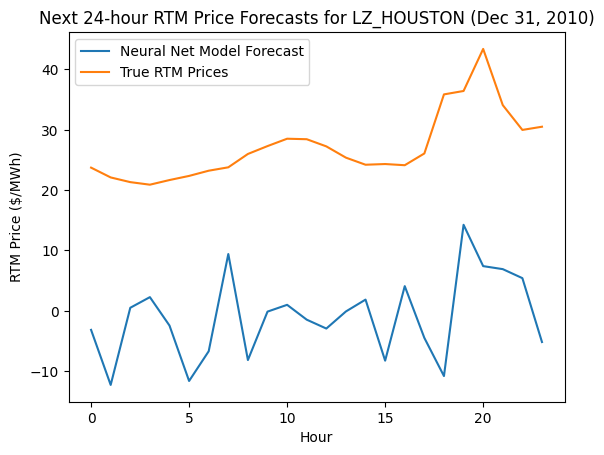

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(24), next_24_forecast, label="Neural Net Model Forecast")
plt.plot(range(24), rtm_hourly_true[:24]["RTM"], label="True RTM Prices")
plt.xlabel("Hour")
plt.ylabel("RTM Price ($/MWh)")
plt.title("Next 24-hour RTM Price Forecasts for LZ_HOUSTON (Dec 31, 2010)")
plt.legend()
plt.show()